# Use Case 4: Comparing Mutation Protein Abundance

<b>Standard imports for playing with and plotting data frames.</b>

In [104]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

<b>Import CPTAC data</b>

In [2]:
import CPTAC

Loading Clinical Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Data...

 ******PLEASE READ******


<b>To begin, retrieve protein abudance and somatic gene mutations. The somatic data is represented in binary format: 0 if no mutation is present in the gene, 1 if the mutation is present.</b>

In [224]:
somatic_mutations = CPTAC.get_somatic()
proteomics = CPTAC.get_proteomics()
phos = CPTAC.get_phosphoproteomics()
phos.head()

idx,AAAS-S495,AAK1-S18,AAK1-S20,AAK1-S21,AAK1-S624,AAK1-S637,AAK1-S670,AAK1-S678,AAK1-S682,AAK1-S731,...,ZZEF1-S1464,ZZEF1-S1488,ZZEF1-S1501,ZZEF1-S1518,ZZEF1-S2444,ZZEF1-T1477,ZZEF1-T1512,ZZEF1-T1521,ZZZ3-S397,ZZZ3-S426
S001,NaN,-0.28,0.44,0.52,-0.70,-0.68,-0.49,-0.43,-0.93,NaN,...,-0.28,-0.20,-0.11,-0.11,-0.08,-0.27,NaN,0.24,0.42,-0.26
S002,NaN,-0.53,-1.14,0.10,-0.66,-0.42,-0.43,-0.29,-0.39,-0.25,...,0.44,0.37,0.60,0.33,NaN,1.13,1.00,0.34,-0.19,-0.55
S003,-0.29,0.42,-0.05,-0.06,-0.03,0.80,NaN,-1.41,0.16,-0.09,...,1.05,0.61,NaN,0.36,0.53,0.52,0.28,-0.27,NaN,NaN
S004,0.15,NaN,-0.54,-0.17,0.21,-0.17,0.58,0.50,NaN,-0.52,...,0.03,-0.18,NaN,0.68,0.28,NaN,0.85,-0.32,0.03,-0.75
S005,0.60,0.64,-0.05,-0.08,0.14,0.63,0.52,-0.76,-0.30,-0.01,...,-0.54,0.48,-0.70,0.26,-0.59,-0.66,-0.13,-0.21,-0.10,0.15


In [175]:
pcutoff = 0.05 / len(proteomics.columns)
pcutoff

5.216484089723526e-06

In [235]:
gene = 'FBXW7'
protein = 'TGFB1'

<b>Once you have found your gene of interest, use the gene to compare somatic and protein abundance utilizing the <code>CPTAC.compare_gene()</code> function. (An array of genes can also be passed to this function). If you want to be reminded of what gene you are comparing, enter <code>cross.name</code> (Also, note the binary nature of the somatic data, 0 if no mutation is present for that sample in that gene, 1 if the mutation is present).</b> 

In [227]:
phosdf = phos.filter(regex=protein)
phosdf.head()

idx,TGFB1I1-S137,TGFB1I1-S140,TGFB1I1-S141,TGFB1I1-S143,TGFB1I1-S164,TGFB1I1-S186,TGFB1I1-S192,TGFB1I1-S194,TGFB1I1-S403,TGFB1I1-S68,TGFB1I1-S80,TGFB1I1-S81,TGFB1I1-S82,TGFB1I1-T180,TGFB1I1-T33,TGFB1I1-Y38,TGFB1I1-Y60
S001,-0.50,-0.14,-0.29,-0.20,-0.58,0.03,-1.95,-1.13,-1.35,-1.27,-0.71,-1.39,-1.51,0.00,-0.87,0.42,-0.32
S002,-0.64,NaN,-0.50,-1.29,-0.57,-0.69,-1.22,-0.77,-0.70,0.68,0.76,NaN,0.28,-2.35,-1.24,-1.13,-0.63
S003,0.06,-0.76,-0.76,0.65,-0.57,-0.01,-0.16,-1.05,-2.20,-0.13,-0.64,-0.98,-0.90,-0.15,0.36,-1.89,NaN
S004,-0.93,-0.25,-0.53,-1.43,-0.91,-0.98,NaN,-0.91,-1.37,-2.01,-2.07,-1.62,NaN,-1.97,-1.89,-2.58,-1.61
S005,-1.28,-0.03,-0.87,-1.40,-0.02,-1.87,-3.47,-0.89,-1.25,-2.22,-0.20,NaN,-1.37,-2.26,-3.90,-1.97,-0.66


In [214]:
genedf = somatic_mutations[gene].to_frame()
genedf.head()

,EIF1AX
S001,0
S002,0
S003,0
S004,0
S005,0


In [215]:
cross = genedf.add(proteindf, fill_value=0).dropna(axis=0)
cross.head()

,EIF1AX,TGFB1
S001,0.0,-0.58
S002,0.0,-1.14
S003,0.0,-0.41
S004,0.0,-0.76
S005,0.0,-0.32


<b>Finally, compare the mutated genes with the non-mutated genes. Plot a boxplot of  protein abundance in mutated against non-mutated.</b>

[Text(0,0.5,'Proteomics'), Text(0.5,0,'Somatic Gene Mutation')]

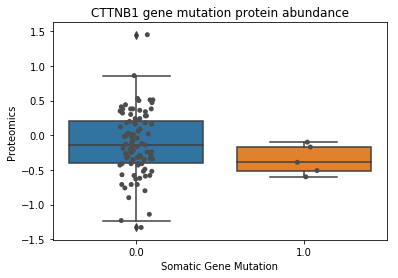

In [216]:
somatic_boxplot = sns.boxplot(data=cross, x=gene,y=protein)
somatic_boxplot.set_title("CTTNB1 gene mutation protein abundance")
somatic_boxplot = sns.stripplot(data=cross, x=gene, y=protein,jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")

#### Now do a t-test

In [209]:
mutated = cross.loc[cross[gene] == 1.0]
wt = cross.loc[cross[gene] == 0.0]

In [210]:
ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
ttest

Ttest_indResult(statistic=-1.1689082296871933, pvalue=0.2452760562482325)

### Cyclins

In [144]:
protList = ['CCNB1', 'CCNB2', 'CCNB3', 'CCNC', 'CCND1', 'CCND2', 'CCND3', 'CCNE1', 'CCNE2', 'CCNF', 'CCNG1', 'CCNG2',
           'CCNH', 'CCNI', 'CCNI2', 'CCNK', 'CCNL1', 'CCNL2', 'CCNO', 'CCNT1', 'CCNT2', 'CCNY', 'CCNYL1', 'CCNYL2',
           'CCNYL3']

In [222]:
genedf = somatic_mutations[gene].to_frame()
for protein in proteomics.columns:
    if protein in proteomics.columns:
        proteindf = proteomics[protein].to_frame()
        cross = genedf.add(proteindf, fill_value=0).dropna(axis=0)
        mutated = cross.loc[cross[gene] == 1.0]
        wt = cross.loc[cross[gene] == 0.0]
        ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
        if ttest[1] <= 0.001:
            print("Test for " + protein + ": ")
            print(ttest)

/anaconda3/envs/ptmresearch/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3157: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/anaconda3/envs/ptmresearch/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Test for C19orf33: 
Ttest_indResult(statistic=-3.7011847048145907, pvalue=0.0003545645436391225)
Test for CCDC8: 
Ttest_indResult(statistic=-3.7973186434767325, pvalue=0.0002536593961365782)
Test for EPPK1: 
Ttest_indResult(statistic=-3.90044607028294, pvalue=0.00017603166955412923)
Test for OBSL1: 
Ttest_indResult(statistic=-4.030460304339136, pvalue=0.00011009550964821268)
Test for PPP1R14A: 
Ttest_indResult(statistic=-3.5540374299055757, pvalue=0.0005856224427540791)
Test for ZNF672: 
Ttest_indResult(statistic=3.794668744315788, pvalue=0.0003600951564155787)


In [239]:
genedf = somatic_mutations[gene].to_frame()
for protein in proteomics.columns:
        phosinfo = phos.filter(regex = protein)
        if phosinfo.empty==False:
            for site in phosinfo.columns:
                sitedf = phosinfo[[site]]
                cross = genedf.add(sitedf, fill_value=0).dropna(axis=0)
                mutated = cross.loc[cross[gene] == 1.0]
                wt = cross.loc[cross[gene] == 0.0]
                ttest = scipy.stats.ttest_ind(mutated[site], wt[site])
                if ttest[1] <= pcutoff:
                    print("Test for " + protein + ": ")
                    print(ttest)

Test for SET: 
Ttest_indResult(statistic=-5.262367555121419, pvalue=9.084536738376796e-07)
Test for SETD1B: 
Ttest_indResult(statistic=-5.262367555121419, pvalue=9.084536738376796e-07)
